# Springboard Data Science Career Track | Capstone Project 2

## Introduction

In this project we will build models to predict fraudulent credit card transactions. In this step we focus on collecting data, organizing it, and making sure it's well defined. The file creditcard.csv was obtained from Kaggle https://www.kaggle.com/mlg-ulb/creditcardfraud.

Complete project proposal is in the documents directory.

## Data Wrangling

We will read creditcard.csv file into a dataframe and then study it. 

Objectives:
1. Do we have the data to tackle the desired question?
2. Can we identify the required target value?
3. Identify potentially useful features?
4. Identify issues with the data?

##### 1. Imports

In [34]:
# Imports
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read csv
df = pd.read_csv('../raw_data/creditcard.csv')

##### 3. Let's look at the data

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Get the number of rows and columns
df.shape

(284807, 31)

In [5]:
# Get df Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##### 4. Check for missing values (NaN)

In [6]:
# Null values
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Our dataset does not have any null values. It has Time, Amount and Class columns along with 28 numerical columns labeled V1.. V28.

##### Let us look at the distributions of values in our dataset.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


##### Now let us look at the histograms of all columns.

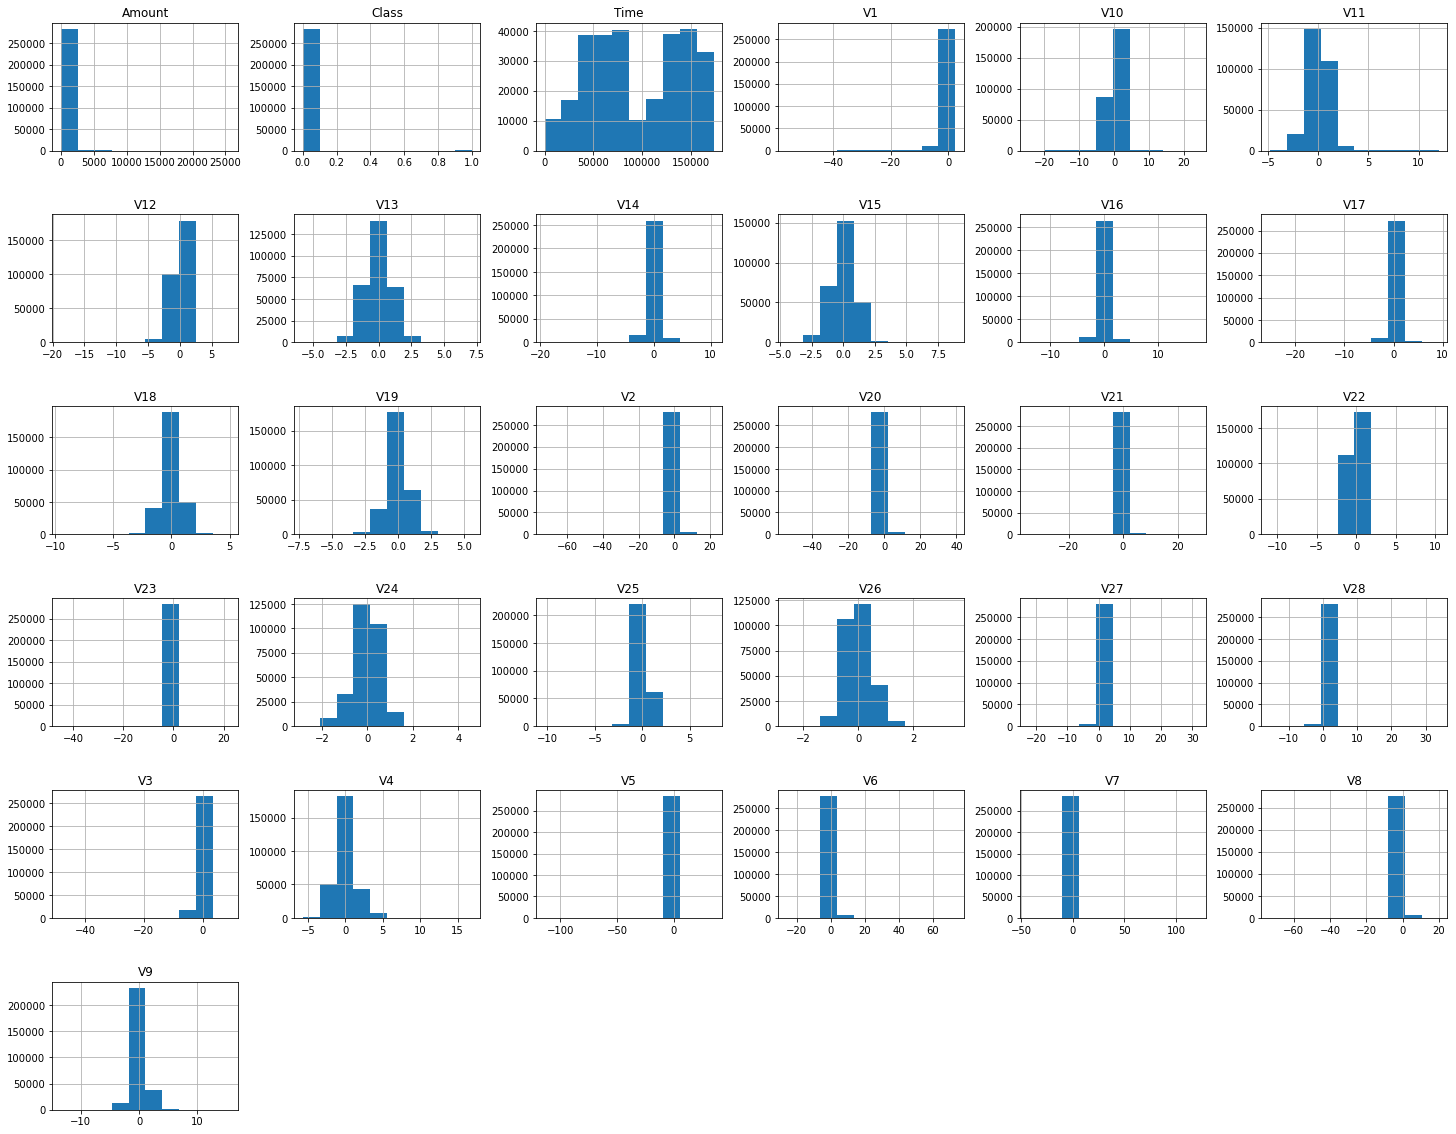

In [8]:
df.hist(figsize=(25, 20))
plt.subplots_adjust(hspace=0.5);

Let's take a closer look at these columns and try to find additional information.

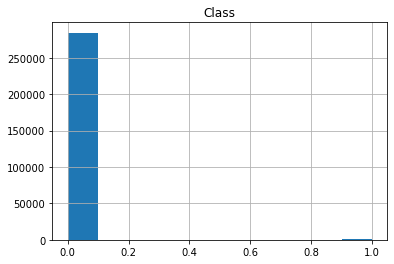

In [9]:
# Class
df.hist(column='Class');

Values of class lie between 0 and 1. Most are either 0 or 1. Class appears to be categorical. Lets confirm.

In [10]:
df['Class'].unique()

array([0, 1], dtype=int64)

Class is categorical. Probably a True(1)/False(0) column.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F0505C190>]],
      dtype=object)

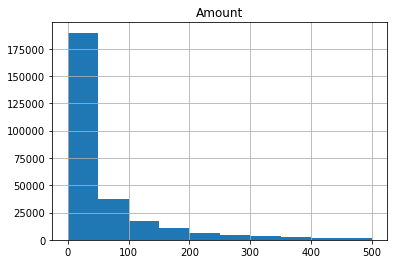

In [11]:
# Amount
df.hist(column='Amount', range=(0,500))

In [12]:
df['Amount'].unique()

array([149.62,   2.69, 378.66, ..., 381.05, 337.54,  95.63])

In [13]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
len (df.loc[df.Amount>200]), len (df.loc[df.Amount<=200])

(28837, 255970)

Amount has a long tailed distribution with the majority values between 0 and 200.

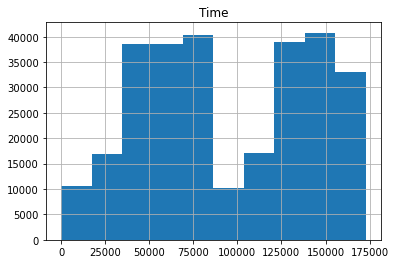

In [15]:
# Time
df.hist(column='Time');

Time values range between 0 and 175000. Majority values appear to be in two buckets 40000-80000 and 120000-160000.

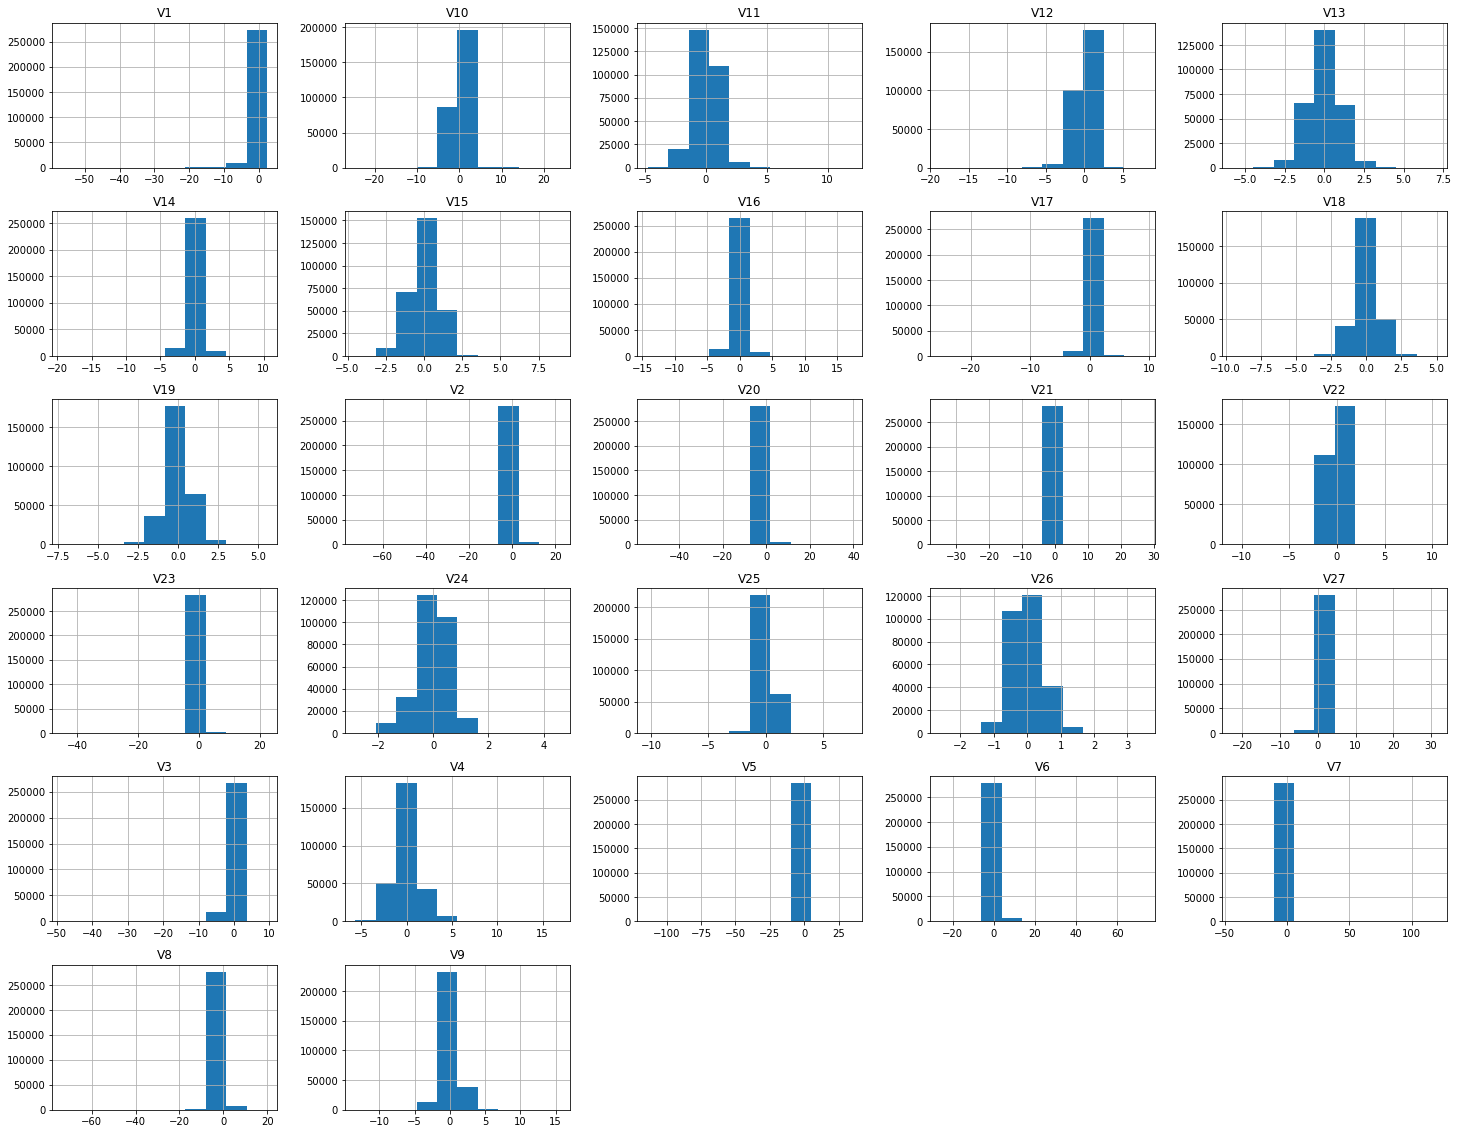

In [16]:
# V1...V28
collist = ['V' + str(x) for x in range(1,28)]
df.hist(column=collist, figsize=(25, 20));

(-113.74330671114599, 34.8016658766686)

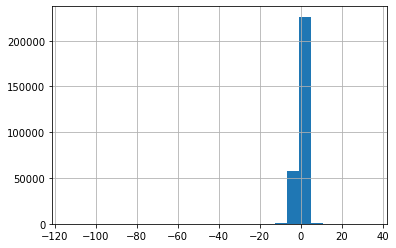

In [17]:
# V5
df["V5"].hist(bins=25)
df['V5'].min(),df['V5'].max()

In [18]:
for x in range(1,28):
    print('V'+str(x) + '\t' + str(df['V'+str(x)].unique()))

V1	[-1.35980713  1.19185711 -1.35835406 ...  1.91956501 -0.24044005
 -0.53341252]
V2	[-0.07278117  0.26615071 -1.34016307 ... -0.30125385  0.53048251
 -0.18973334]
V3	[ 2.53634674  0.16648011  1.77320934 ... -3.24963981  0.70251023
  0.70333737]
V4	[ 1.37815522  0.44815408  0.37977959 ... -0.55782812  0.68979917
 -0.50627124]
V5	[-0.33832077  0.06001765 -0.50319813 ...  2.63051512 -0.37796113
 -0.01254568]
V6	[ 0.46238778 -0.08236081  1.80049938 ...  3.0312601   0.62370772
 -0.64961669]
V7	[ 0.23959855 -0.07880298  0.79146096 ... -0.29682653 -0.68617999
  1.57700625]
V8	[ 0.0986979   0.08510165  0.24767579 ...  0.70841718  0.67914546
 -0.41465041]
V9	[ 0.36378697 -0.25542513 -1.51465432 ...  0.43245405  0.39208671
  0.48617951]
V10	[ 0.09079417 -0.16697441  0.20764287 ... -0.48478176 -0.39912565
 -0.91542665]
V11	[-0.55159953  1.61272666  0.62450146 ...  0.41161374 -1.93384882
 -1.04045834]
V12	[-0.61780086  1.06523531  0.06608369 ...  0.06311886 -0.96288614
 -0.03151305]
V13	[-0.99138

V1..V28 are numeric values. They do not appear to be categorical.

#####  Let's now look for duplicate rows

In [20]:
df_dup = df[df.duplicated(subset=None, keep='first')]
df_dup.shape

(1081, 31)

In [21]:
df_dup.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0


Looks like we have 1081 duplicate rows. Do we need to drop them??? We will decide later.

Now we will try to find a unique key for each row. This will probably be a combination of columns.